In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\ed\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('MBA.csv')

#### data exploration

In [3]:
# Displaying the first 5 rows of the dataset
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [4]:
# Checking data information and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [5]:
# Checking for missing values in the dataset
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [6]:
# Summary statistics of the dataset
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [ ]:
# Dropping the 'admission' column since it has over 80% missing values
df = df.drop("admission", axis=1)

In [ ]:
# Display updated dataframe with new column structure
df.head()

#### DATA CLEANING AND FEATURE ENGINEERING

In [8]:
# dropping off Admission column
df = df.drop("admission", axis=1)

creating classification column from GPA

In [10]:
# Define bins and labels for classifications
bins = [0, 1, 2, 3, 3.5, 4]  # GPA thresholds
labels = ['Fail', 'Third Class', 'Second Class Lower', 'Second Class Upper', 'First Class']  # Class labels

# Group GPA into classifications
df['classification'] = pd.cut(df['gpa'], bins=bins, labels=labels, include_lowest=True)

creating classification column from Work Experience

In [159]:
# Define bins and labels for work_years classification
bins = [1,3,6,9]  # work_exp thresholds
labels = ['1-3', '4-6', '7-9']  # Class labels

# Group WORK_EXP into classifications
df['work_year'] = pd.cut(df['work_exp'], bins=bins, labels=labels, include_lowest=True)

In [173]:
# Display the updated dataframe with the new 'classification' and 'work_year' columns
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,classification,work_year
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Second Class Upper,1-3
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Second Class Upper,4-6
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Second Class Upper,4-6
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Second Class Upper,4-6
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Second Class Upper,4-6


###  DATA  ANALYSIS QUESTIONS

How does work experience affect GPA?

What is the distribution of GMAT scores?

Which majors tend to have the highest GMAT scores?

What are the GPA differences between international and domestic students?

Are there differences in GPA between genders?

Which majors perform better in terms of GPA?

What is the distribution of students across different work industries?

How do GPA classifications differ in terms of GMAT scores and work experience?

How does race correlate with GPA?

How do GMAT scores vary across different work experience ranges?

## DATA VISUALIZATION

Work experience effect on GPA

In [78]:
# Grouping data by work experience and calculating the mean GPA for each group
exp_gpa = df.groupby('work_exp')[['gpa']].mean().sort_values(by='work_exp', ascending=False)
exp_gpa

,gpa
work_exp,
9.0,3.095000
8.0,3.216842
7.0,3.252888
6.0,3.252507
5.0,3.251327
4.0,3.246973
3.0,3.255420
2.0,3.252813
1.0,3.325000


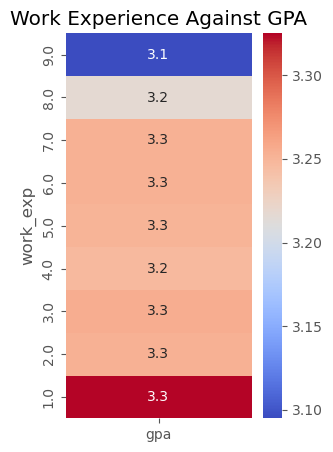

In [288]:
# Visualize work experience effect on GPA
plt.figure(figsize=(3, 5))
sns.heatmap(exp_gpa, annot=True, cmap='coolwarm')
plt.title('Work Experience Against GPA')
plt.show()

Distribution of GMAT scores

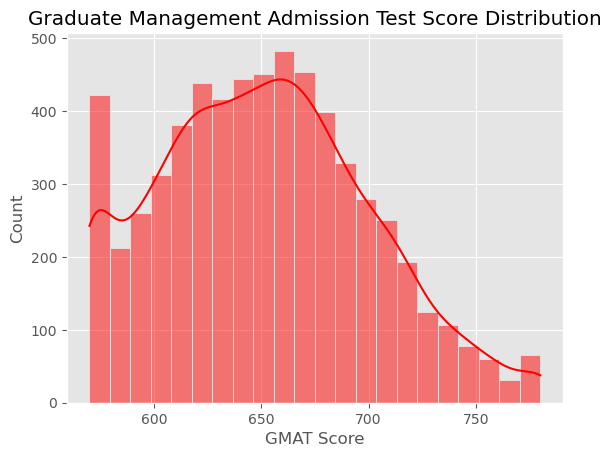

In [263]:
# 2. Distribution of GMAT scores
sns.histplot(df['gmat'], bins=22, kde=True, color='red')
plt.title('Graduate Management Admission Test Score Distribution')
plt.xlabel('GMAT Score')
plt.show()

Majors with highest GMAT scores

In [266]:
# Grouping data by major and calculating the mean GMAT for each group
group_byMajor = df.groupby('major')[['gmat']].max()
group_byMajor

,gmat
major,
Business,780.0
Humanities,780.0
STEM,780.0


Text(0.5, 1.0, 'GMAT Score Amongst Majors')

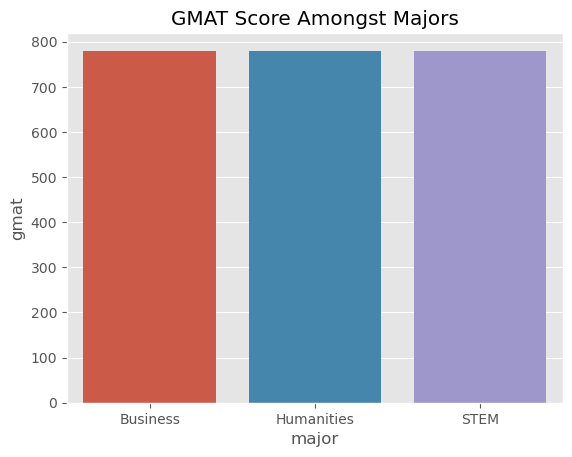

In [190]:
# Visualize GMAT scores across majors
sns.barplot(data=group_byMajor, x='major', y='gmat', hue='major')
plt.title('GMAT Score Amongst Majors')

GPA differences between international and domestic students

In [267]:
# 4. # Grouping data by work experience and calculating the mean GPA for each group
group_byInternational = df.groupby('international')[['gpa']].mean()
group_byInternational

,gpa
international,
False,3.253527
True,3.244066


In [2]:
# Visualize GPA differences between international and domestic students
ax = sns.barplot(data=group_byInternational, x='international', y='gpa', hue='international', legend=False)
plt.title('GPA Amongst International and Domestic Students')
ax.set_xticklabels(['Domestic', 'International'])
plt.show()

NameError: name 'sns' is not defined

GPA between genders

In [269]:
# 5. GPA differences between genders
group_byGender_gpa = df.groupby('gender')[['gpa']].mean()
group_byGender_gpa

,gpa
gender,
Female,3.246259
Male,3.253256


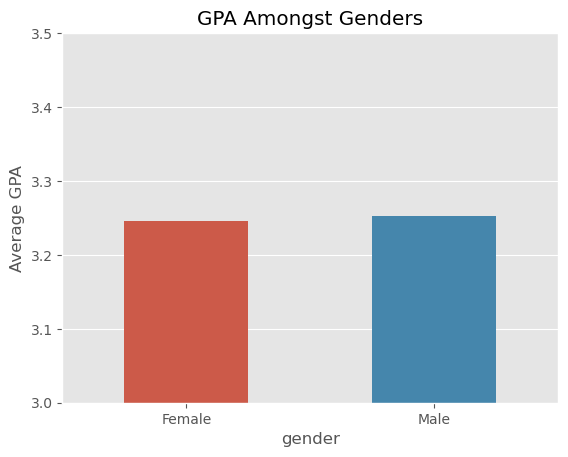

In [270]:
# Visualize GPA differences between genders
ax = sns.barplot(data=group_byGender_gpa, x='gender', y='gpa', hue='gender', width=0.5)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',   
                xytext=(0, 9),                  
                textcoords='offset points')
plt.title('GPA Amongst Genders')
plt.ylim(3.0, 3.5)
plt.ylabel('Average GPA')
plt.show()

Majors performance in terms of GPA

In [271]:
# 6. Which majors perform better in terms of GPA?
group_byMajor_gpa = df.groupby('major')[['gpa']].mean()
group_byMajor_gpa

,gpa
major,
Business,3.251844
Humanities,3.251000
STEM,3.249227


(3.0, 3.5)

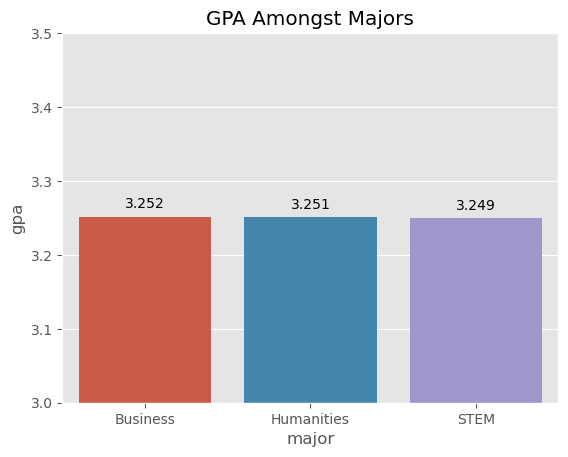

In [272]:
# Visualize GPA performance across majors
ax = sns.barplot(group_byMajor_gpa, x='major', y='gpa', hue='major')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',   
                xytext=(0, 9),                  
                textcoords='offset points')     
plt.title('GPA Amongst Majors')
plt.ylim(3.0, 3.5)

Distribution of students across different work industries

In [231]:
# 7. Distribution of students across different work industries
work_industry = df.groupby('work_industry')['application_id'].count().reset_index(name='Student Count')
work_industry = work_industry.sort_values(by='Student Count', ascending=False)
work_industry

,work_industry,Student Count
1,Consulting,1619
10,PE/VC,907
13,Technology,716
8,Nonprofit/Gov,651
5,Investment Banking,580
3,Financial Services,451
9,Other,421
4,Health Care,334
6,Investment Management,166
0,CPG,114


Text(0.5, 1.0, 'Student Distribution Across Work Industries')

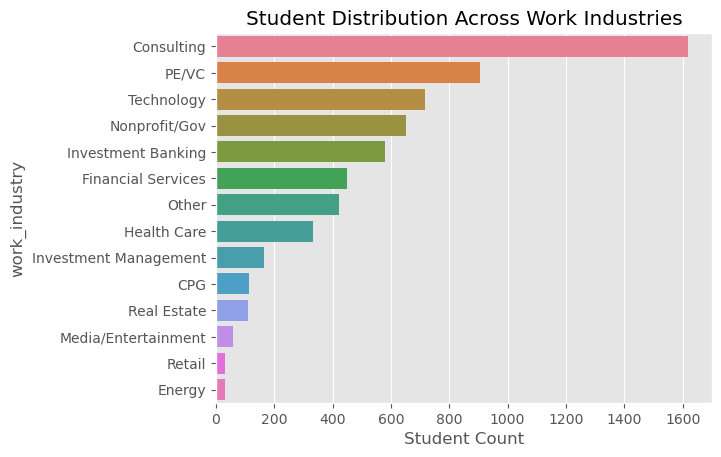

In [273]:
# Visualize the distribution of students across work industries
sns.barplot(work_industry, x='Student Count', y='work_industry', hue='work_industry')
plt.title('Student Distribution Across Work Industries')

GPA in terms of GMAT scores & Work Experience

In [239]:
# 8. How do GPA classifications differ in terms of GMAT scores and work experience?
gmat_work_exp = pd.pivot_table(data=df, values='gpa', index='gmat', columns='work_exp', aggfunc='mean')
gmat_work_exp

work_exp,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
gmat,,,,,,,,,
570.0,NaN,3.170000,3.093500,3.098269,3.087317,3.080000,3.120000,3.160000,2.89
580.0,NaN,3.150000,3.135833,3.125455,3.152065,3.154894,3.128182,3.055000,NaN
590.0,NaN,3.152500,3.117333,3.120980,3.144273,3.120645,3.117500,3.065000,NaN
600.0,NaN,3.140000,3.153158,3.188806,3.176794,3.161948,3.153571,3.105000,NaN
610.0,NaN,3.210000,3.154211,3.165122,3.173247,3.190515,3.132000,3.280000,NaN
620.0,3.30,3.010000,3.182857,3.210345,3.204940,3.191019,3.182174,3.130000,NaN
630.0,NaN,3.210000,3.200303,3.189630,3.206543,3.231102,3.218182,NaN,NaN
640.0,NaN,3.430000,3.277097,3.237907,3.234817,3.249091,3.201111,2.990000,3.30
650.0,NaN,3.305000,3.244231,3.249596,3.251297,3.253269,3.273636,3.235000,NaN


Text(0.5, 1.0, 'GPA in terms of GMAT Scores & Work Experience')

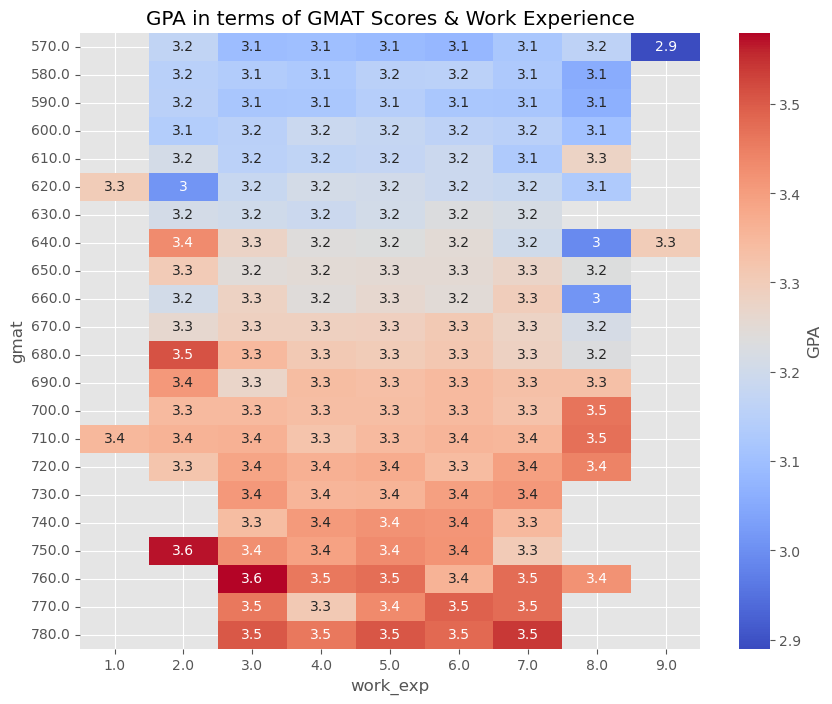

In [274]:
# Visualize GPA in terms of GMAT scores & Work Experience
plt.figure(figsize=(10, 8))
sns.heatmap(gmat_work_exp, annot=True, cmap='coolwarm', cbar_kws={'label': 'GPA'})
plt.title('GPA in terms of GMAT Scores & Work Experience')

Race correlation with GPA

In [278]:
# 9. How does race correlate with GPA?
group_byRace_gpa = df.groupby('race')[['gpa']].mean()
group_byRace_gpa

,gpa
race,
Asian,3.254874
Black,3.254007
Hispanic,3.255822
Other,3.261603
White,3.249911


(3.2, 3.3)

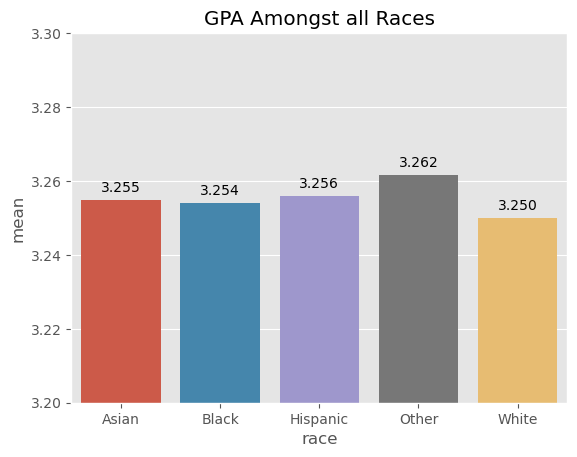

In [279]:
ax = sns.barplot(data=group_byRace,x='race',y='mean', hue='race')
for p in ax.patches:
     ax.annotate(format(p.get_height(), '.3f'),  # Format the label (2 decimal places)
                 (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of label
                 ha = 'center', va = 'center',   # Align horizontal (ha) and vertical (va) to center
                 xytext=(0, 9),                  # Offset position by 9 points above the bar
                 textcoords='offset points')     # Use offset points for placement
plt.title('GPA Amongst all Races')
plt.ylim(3.2, 3.3) #zooms in on the y_axis

GMAT scores across different work experience ranges

In [281]:
# 10. How do GMAT scores vary across different work experience ranges?
group_byWorkExp_gmat = df.groupby('work_year')[['gmat']].mean()
group_byWorkExp_gmat

C:\Users\ed\AppData\Local\Temp\ipykernel_17664\2277073898.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_byWorkExp_gmat = df.groupby('work_year')[['gmat']].mean()


,gmat
work_year,
1-3,652.828784
4-6,650.787519
7-9,653.415233


(600.0, 700.0)

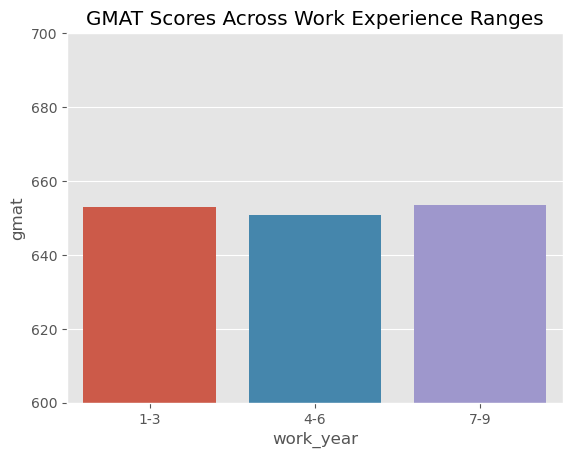

In [284]:
# Visualize GMAT scores across different work experience ranges
ax = sns.barplot(data=group_byWorkExp_gmat, x='work_year', y='gmat', hue='work_year')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',   
                xytext=(0, 9),                  
                textcoords='offset points')
plt.title('GMAT Scores Across Work Experience Ranges')
plt.ylim(600, 700) #zooms in on the y_axis

OBSERVATION : most applicant have 4-6 years of experience

Text(0, 0.5, 'Applicants Count')

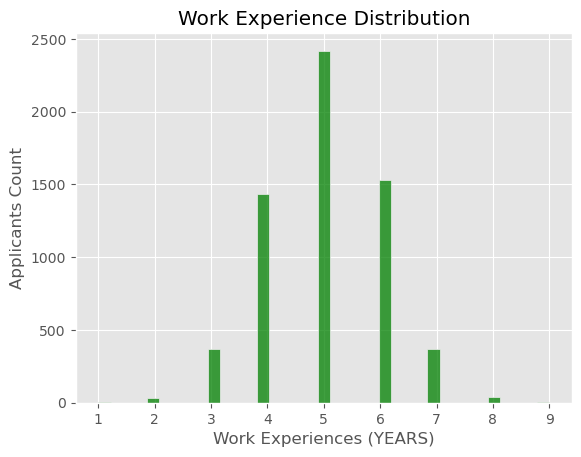

In [287]:
# Distribution of Work Experiences
sns.histplot(df['work_exp'], color='green')
plt.title('Work Experience Distribution')
plt.xlabel('Work Experiences (YEARS)')
plt.ylabel('Applicants Count')

### Key Insights:

##### How does work experience affect GPA?
There doesn't seem to be a clear linear relationship between work experience and GPA. The average GPA is relatively consistent across different levels of experience, with slight fluctuations.

##### What is the distribution of GMAT scores?
GMAT scores show a typical bell curve, with the majority of scores between 600-700. This indicates that most students score in the mid-range, with fewer outliers at the high and low ends.

##### Which majors tend to have the highest GMAT scores?
Business, Humanities, and STEM majors all have the same maximum GMAT score of 780, indicating top performers in each field.

##### What are the GPA differences between international and domestic students?
International students have slightly lower GPAs compared to domestic students (3.244 vs. 3.253), though the difference is marginal.

##### Are there differences in GPA between genders?
There’s no significant difference in GPA between males and females, with only a slight edge for male students (3.253 vs. 3.246).

##### Which majors perform better in terms of GPA?
The difference in GPA across Business, Humanities, and STEM majors is minimal, all averaging around 3.25.

##### What is the distribution of students across different work industries?
The majority of students come from Consulting (1,619) and PE/VC (907), indicating these industries might be common career paths for MBA students. Other industries like Retail and Energy have the fewest applicants.

##### How do GPA classifications differ in terms of GMAT scores and work experience?
There's a nuanced relationship between GMAT, GPA, and work experience. Higher GMAT scores tend to correlate with higher GPAs across different work experience ranges.

##### How does race correlate with GPA?
There isn't any significant difference between each races as regarding GPA.
"Other" races have higher GPA of 0.06 than the second highest race "Hispanic".

##### How do GMAT scores vary across different work experience ranges?
Even though with minimal differences, students with 7-9 years of experience tends to top the list of higest GMAT score, leaving students with 4-6 years the least GMAT score in the group.

#### OTHER VISUALS

Text(0, 0.5, 'Student Count')

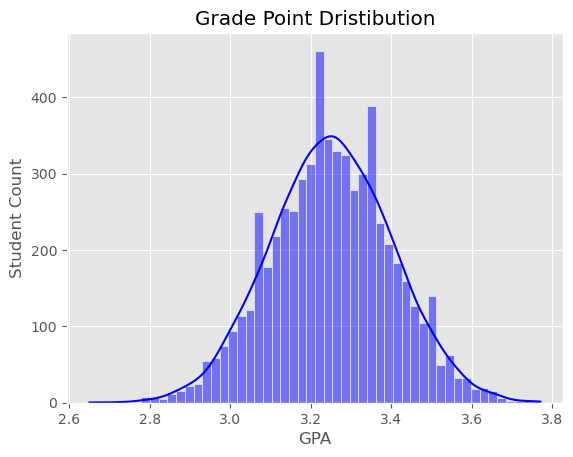

In [286]:
# Distribution of GPA
sns.histplot(df['gpa'], kde=True, color='blue')
plt.title('Grade Point Dristibution')
plt.xlabel('GPA')
plt.ylabel('Student Count')

Work Experience (year) Distribution